# 多元数据的可视化

### 绘制折线图（轮廓图）呈现每一个样本在各特征上的表现

（1）做直角坐标系，横坐标取p个点，表示p个变量
（2）各p点上取值
（3）p个点连线
（4）每个被试皆重复上述步骤

In [9]:
line <- read.table("course.data",encoding = 'UTF-8')
head(line)

,政治,语文,外语,数学,物理
,<int>,<int>,<int>,<int>,<int>
1,99,94,93,100,100
2,99,88,96,99,97
3,100,98,81,96,100
4,93,88,88,99,96
5,100,91,72,96,78
6,90,78,82,75,97


In [10]:
outline <- function(x, txt=T){
    if(is.data.frame(x)==T){
        x <- as.matrix(x)
        m <- nrow(x); n<-ncol(x)
        plot(c(1,n), c(min(x), max(x)),
            type="n", main = "The outline graph of Data",
            xlab ="Number", ylab = "Value")
        for(i in 1:m){
            lines(x[i,], col=i)
            if(txt==T){
                k <- dimnames(x)[[1]][i]
                text(1+(i-1)%%n, x[i,1+(i-1)%%n], k)
            }
        }
    }  
}
#txt==T时，给出挂测值标号，否则不标

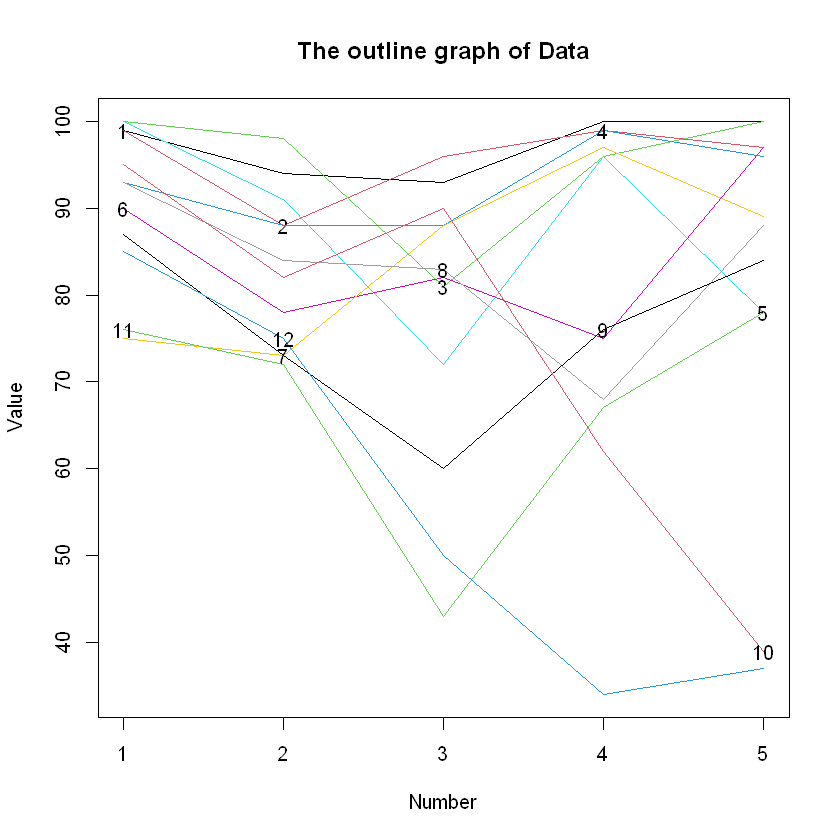

In [11]:
outline(line)

In [12]:
#画的还可以，但是太复杂了！
#使用ggplot2包中的高级绘图函数
library('ggplot2')

In [13]:
#首先宽数据转长数据
head(line)
line$id <- 1:dim(line)[1]
line2 <- reshape2::melt(line,id.vars = 'id')
line2

,政治,语文,外语,数学,物理
,<int>,<int>,<int>,<int>,<int>
1,99,94,93,100,100
2,99,88,96,99,97
3,100,98,81,96,100
4,93,88,88,99,96
5,100,91,72,96,78
6,90,78,82,75,97


,id,variable,value
,<int>,<fct>,<int>
1,1,政治,99
13,1,语文,94
25,1,外语,93
37,1,数学,100
49,1,物理,100
2,2,政治,99
14,2,语文,88
26,2,外语,96
38,2,数学,99


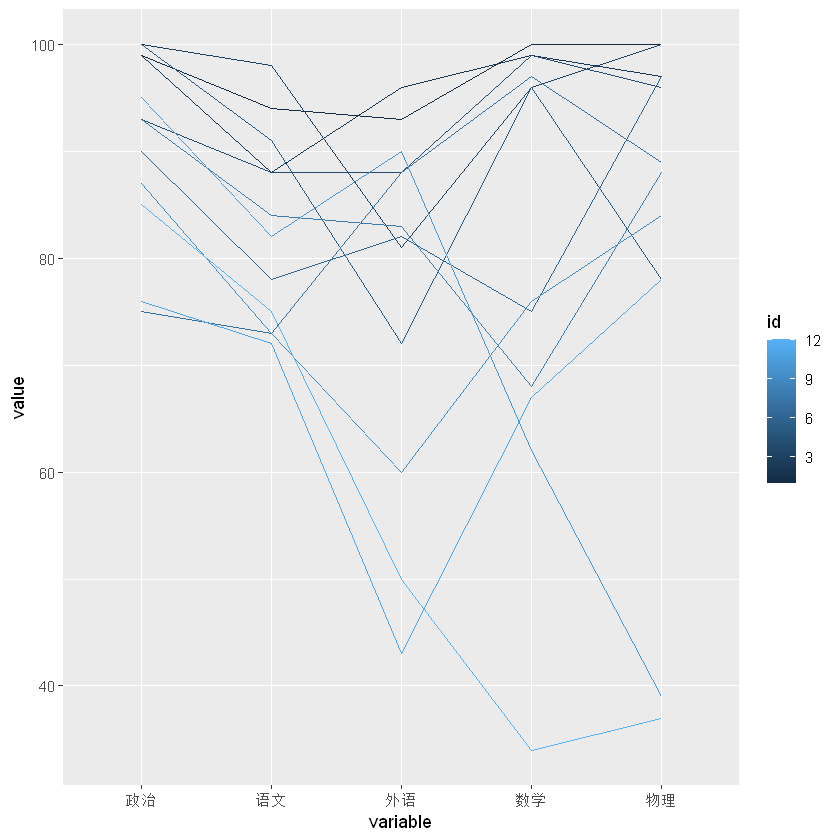

In [14]:
ggplot(line2,aes(x=variable, y=value, group=id, color=id)) +
      geom_line() 

### 星图

（1）作圆， 把圆周p等分
（2）连接圆心和各分点，把p条半径依次作为坐标轴
（3）n次观测值合一作n个星图

In [15]:
line

,政治,语文,外语,数学,物理,id
,<int>,<int>,<int>,<int>,<int>,<int>
1,99,94,93,100,100,1
2,99,88,96,99,97,2
3,100,98,81,96,100,3
4,93,88,88,99,96,4
5,100,91,72,96,78,5
6,90,78,82,75,97,6
7,75,73,88,97,89,7
8,93,84,83,68,88,8
9,87,73,60,76,84,9


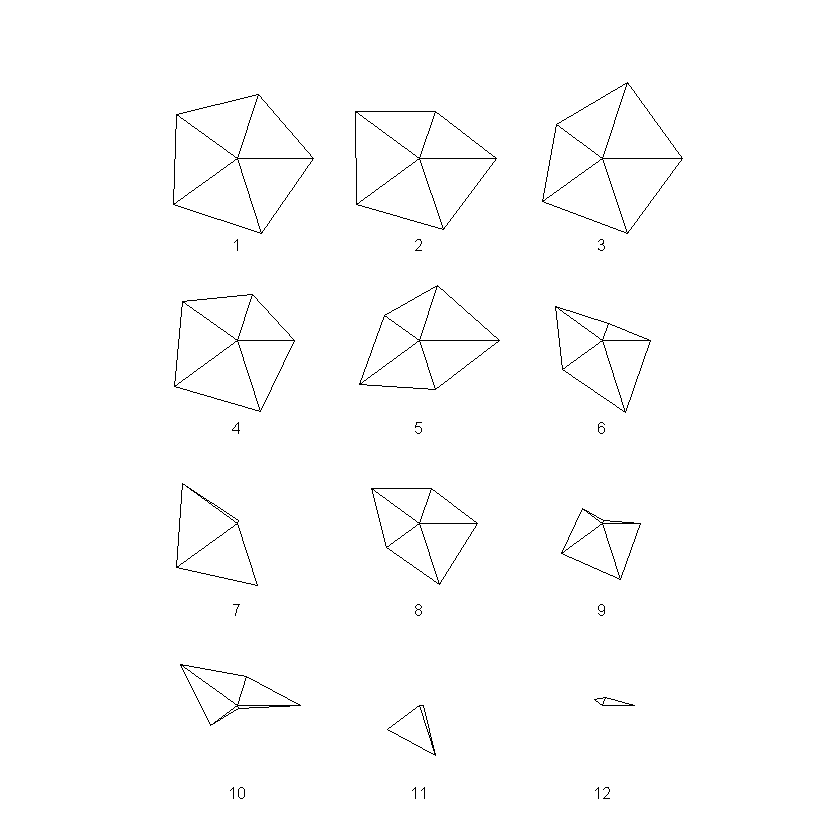

In [16]:
stars(line[1:5])
#星图中水平轴是第一个特征，沿逆时针，依次是特征2, 特征3...

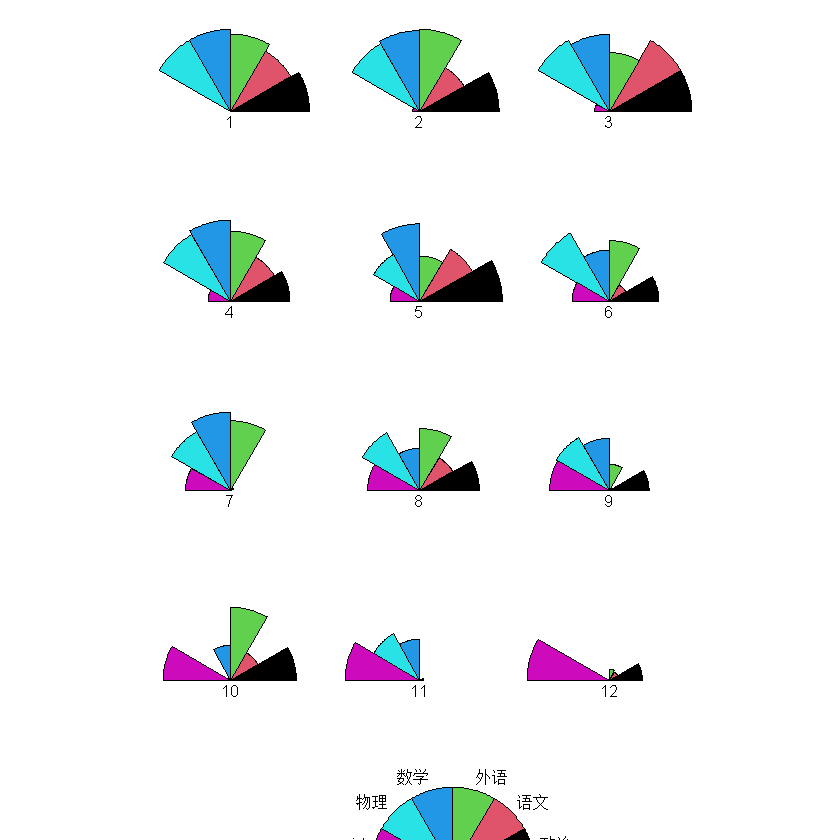

In [18]:
#上面的不好理解？
stars(line, full= F, draw.segments = T, key.loc = c(5,0,5), mar = c(2,0,0,0))

### 热力图显示多变量相关性

In [18]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [19]:
corr <- round(cor(mtcars),1)
corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0,-0.9,-0.8,-0.8,0.7,-0.9,0.4,0.7,0.6,0.5,-0.6
cyl,-0.9,1.0,0.9,0.8,-0.7,0.8,-0.6,-0.8,-0.5,-0.5,0.5
disp,-0.8,0.9,1.0,0.8,-0.7,0.9,-0.4,-0.7,-0.6,-0.6,0.4
hp,-0.8,0.8,0.8,1.0,-0.4,0.7,-0.7,-0.7,-0.2,-0.1,0.7
drat,0.7,-0.7,-0.7,-0.4,1.0,-0.7,0.1,0.4,0.7,0.7,-0.1
wt,-0.9,0.8,0.9,0.7,-0.7,1.0,-0.2,-0.6,-0.7,-0.6,0.4
qsec,0.4,-0.6,-0.4,-0.7,0.1,-0.2,1.0,0.7,-0.2,-0.2,-0.7
vs,0.7,-0.8,-0.7,-0.7,0.4,-0.6,0.7,1.0,0.2,0.2,-0.6
am,0.6,-0.5,-0.6,-0.2,0.7,-0.7,-0.2,0.2,1.0,0.8,0.1
gear,0.5,-0.5,-0.6,-0.1,0.7,-0.6,-0.2,0.2,0.8,1.0,0.3


In [20]:
#引入ggcorplot包
library(ggcorrplot)

Warning message:
"程辑包'ggcorrplot'是用R版本4.2.2 来建造的"


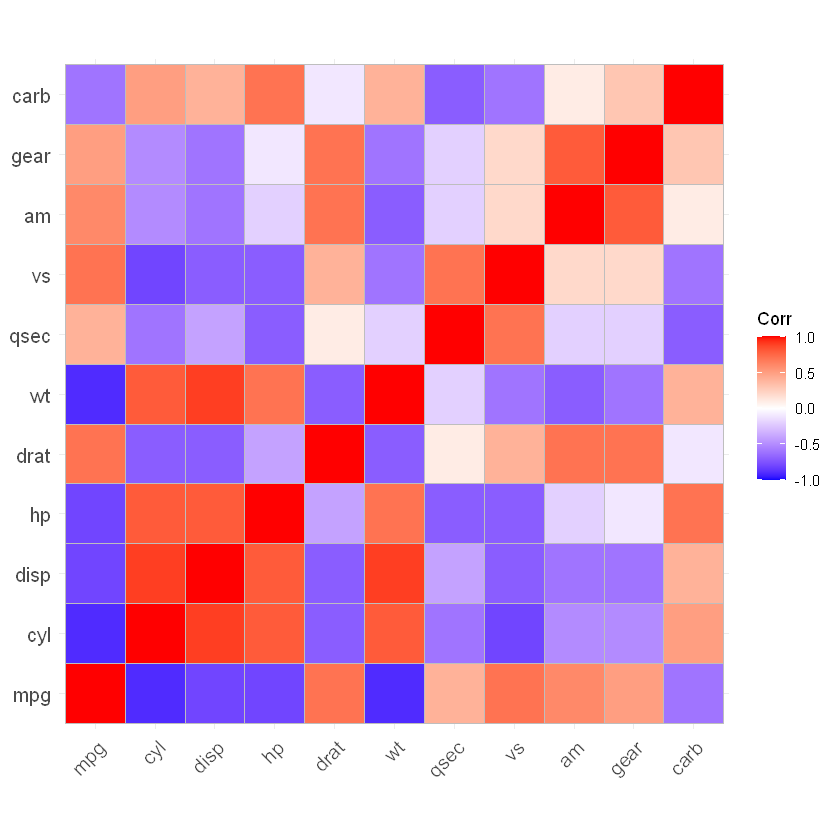

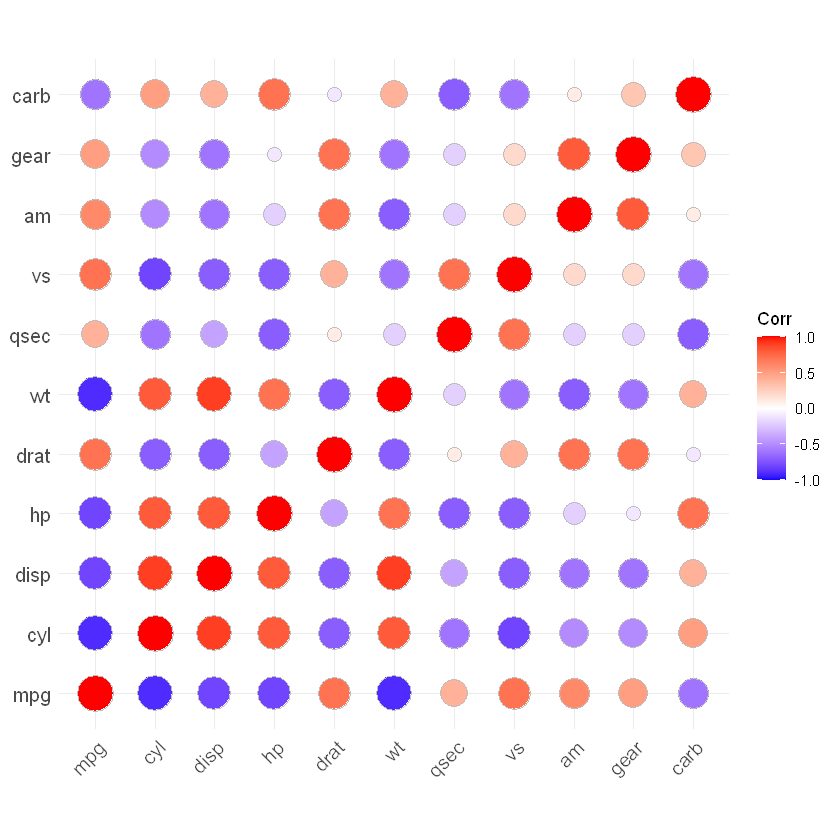

In [21]:
ggcorrplot(corr)
ggcorrplot(corr, method = "circle")

In [23]:
#还需要显著性
p <- Hmisc::rcorr(corr)$P
corr
p

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0,-0.9,-0.8,-0.8,0.7,-0.9,0.4,0.7,0.6,0.5,-0.6
cyl,-0.9,1.0,0.9,0.8,-0.7,0.8,-0.6,-0.8,-0.5,-0.5,0.5
disp,-0.8,0.9,1.0,0.8,-0.7,0.9,-0.4,-0.7,-0.6,-0.6,0.4
hp,-0.8,0.8,0.8,1.0,-0.4,0.7,-0.7,-0.7,-0.2,-0.1,0.7
drat,0.7,-0.7,-0.7,-0.4,1.0,-0.7,0.1,0.4,0.7,0.7,-0.1
wt,-0.9,0.8,0.9,0.7,-0.7,1.0,-0.2,-0.6,-0.7,-0.6,0.4
qsec,0.4,-0.6,-0.4,-0.7,0.1,-0.2,1.0,0.7,-0.2,-0.2,-0.7
vs,0.7,-0.8,-0.7,-0.7,0.4,-0.6,0.7,1.0,0.2,0.2,-0.6
am,0.6,-0.5,-0.6,-0.2,0.7,-0.7,-0.2,0.2,1.0,0.8,0.1
gear,0.5,-0.5,-0.6,-0.1,0.7,-0.6,-0.2,0.2,0.8,1.0,0.3


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,NA,3.458565e-09,8.131585e-09,5.146017e-06,2.173785e-05,2.040184e-08,1.310692e-02,1.713588e-05,1.870638e-03,6.232914e-03,4.320556e-03
cyl,3.458565e-09,NA,4.543562e-09,8.694614e-07,5.771711e-05,6.525079e-07,5.675104e-03,1.723126e-06,4.296581e-03,9.672112e-03,3.067906e-03
disp,8.131585e-09,4.543562e-09,NA,2.282631e-05,4.419540e-06,3.907608e-09,2.032881e-02,3.884761e-05,8.379883e-04,2.331829e-03,1.162562e-02
hp,5.146017e-06,8.694614e-07,2.282631e-05,NA,2.503356e-03,1.395321e-04,3.072542e-04,4.024920e-08,3.807903e-02,7.303047e-02,9.359895e-05
drat,2.173785e-05,5.771711e-05,4.419540e-06,2.503356e-03,NA,7.767796e-07,1.404240e-01,3.531559e-03,1.242322e-05,6.050189e-05,8.838669e-02
wt,2.040184e-08,6.525079e-07,3.907608e-09,1.395321e-04,7.767796e-07,NA,4.731985e-02,2.557188e-04,1.786849e-04,9.230473e-04,2.099347e-02
qsec,1.310692e-02,5.675104e-03,2.032881e-02,3.072542e-04,1.404240e-01,4.731985e-02,NA,2.286319e-04,5.277362e-01,6.676093e-01,3.368253e-06
vs,1.713588e-05,1.723126e-06,3.884761e-05,4.024920e-08,3.531559e-03,2.557188e-04,2.286319e-04,NA,4.684249e-02,7.853950e-02,1.312202e-04
am,1.870638e-03,4.296581e-03,8.379883e-04,3.807903e-02,1.242322e-05,1.786849e-04,5.277362e-01,4.684249e-02,NA,1.229685e-07,3.623496e-01
gear,6.232914e-03,9.672112e-03,2.331829e-03,7.303047e-02,6.050189e-05,9.230473e-04,6.676093e-01,7.853950e-02,1.229685e-07,NA,5.503220e-01


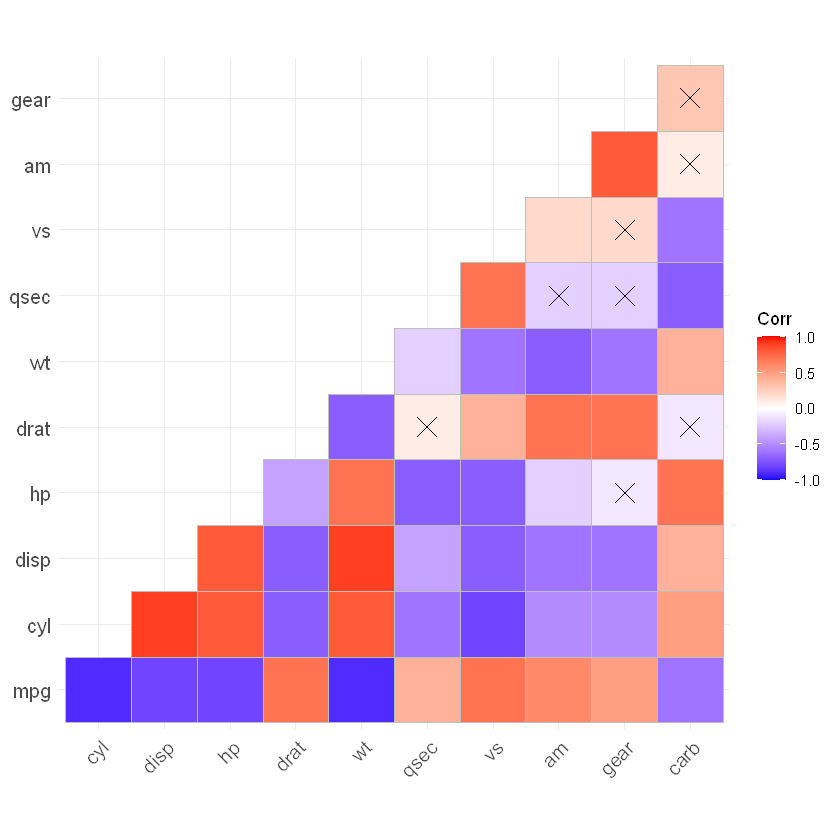

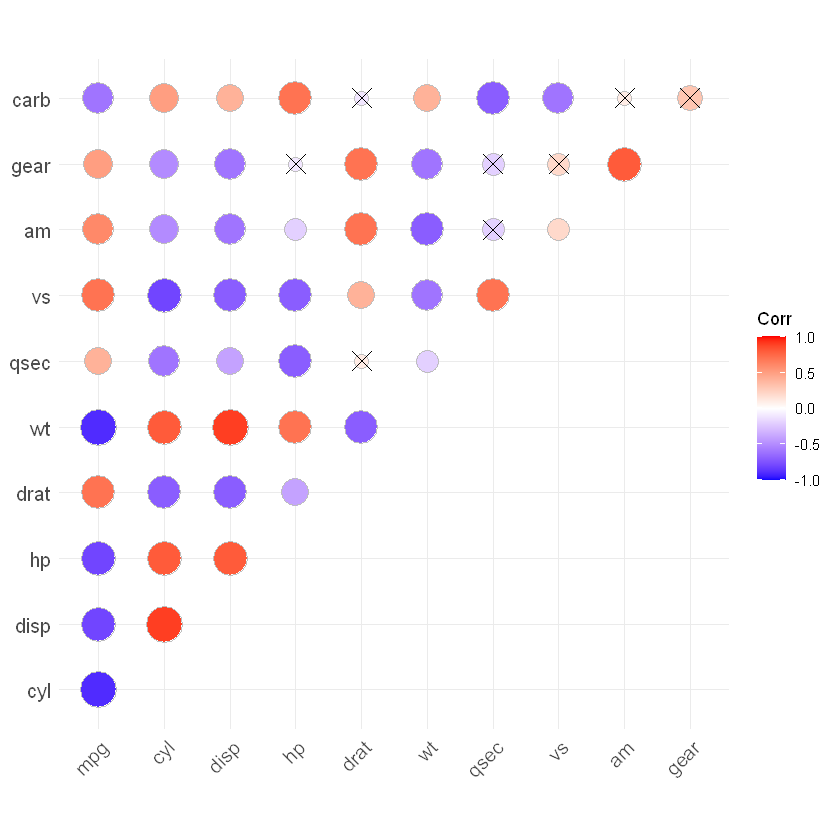

In [24]:
ggcorrplot(corr, type = 'lower',p.mat = p)
ggcorrplot(corr, type = 'upper',method = "circle",p.mat = p)